# Potato Project Phase 3
#### Thi Nguyen, 862051496
#### Sydney Pun 862053259
#### Heng Tan 862155921

## Loading the Datasets:

We will first load the Forest Fires in Australia (fire_archive_M6_96619) dataset.

In [ ]:
#import nbimporter
#import Australian_Dataset_Analysis.ipynb
%run Australian_Dataset_Analysis.ipynb


* *Output for this cell cleared to save space.*

In [8]:
Aus_Fires_df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.0,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.3,301.339138,51.132176,0.019439
...,...,...,...,...,...,...,...,...,...,...,...
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.3,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.3,400.100000,3679.500000,3.000000


In [9]:
nifc_df.describe()

,Total Acres
count,1.790000e+02
mean,2.254127e+05
...,...
75%,2.719965e+05
max,1.305592e+06


In [10]:
FiresInBrazil.describe()

,year,number
count,5837.000000,5837.00000
mean,2007.834847,119.74029
...,...,...
75%,2013.000000,131.00000
max,2017.000000,998.00000


## Setting Up the Model

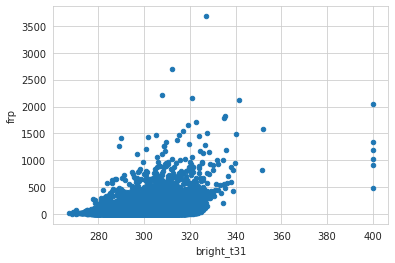

In [17]:
from sklearn.linear_model import LinearRegression

Aus_train = Aus_Fires_df.loc[:].copy()
Aus_test  = Aus_Fires_df.loc[:].copy()

X_train = Aus_train[["bright_t31"]]
X_test  = Aus_test[["bright_t31"]]
y_train = Aus_train["frp"]

Aus_train.plot.scatter(x="bright_t31", y="frp")

In [30]:
X_train.shape
X_train.describe()

,bright_t31
count,36011.000000
mean,301.339138
...,...
75%,308.600000
max,400.100000


In [28]:
y_train.shape
y_train.describe()

count    36011.000000
mean        51.132176
             ...     
75%         52.800000
max       3679.500000
Name: frp, Length: 8, dtype: float64

In [18]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([42.82145862, 42.82145862, 45.70202487, ..., 28.62438211,
       28.41862738, 29.65315577])

In [31]:
model.coef_

array([2.05754732])

In [32]:
model.intercept_

-568.8873599165928

## Fitting Linear Regression Model

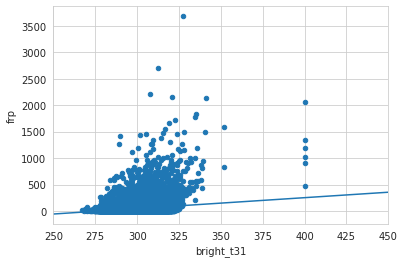

In [25]:
X_Aus = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_Aus["bright_t31"] = np.linspace(250, 450, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_Aus = pd.Series(
    model.predict(X_Aus), # y values in Series.plot.line()
    index=X_Aus["bright_t31"]    # x values in Series.plot.line()
)

# plot the data, then the model
Aus_train.plot.scatter(x="bright_t31", y="frp")
y_Aus.plot.line()

## Building Model Using Validation Set:

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

# pipeline and fit to training set
pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor()
)
pipeline.fit(X=X_train, y=y_train)
    
scores = cross_val_score(pipeline, 
                         X=X_train,
                         y=y_train,
                         cv=5)  # cv refers to number of cross-validation cuts
scores

array([-0.03854447, -0.0010694 ,  0.01171659,  0.0271413 ,  0.09102278])

In [42]:
Y_predict = pipeline.predict(X=X_test)
#output = pd.DataFrame(data={"id":df_test.index,"ibu":Y_predict}) # first need to create df_test 
output = pd.DataFrame(data={"id":Aus_Fires_df.index,"frp":Y_predict}) 

output.to_csv(path_or_buf="Aus_results.csv",index=False,quoting=3,sep=',')